In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [3]:
train_datagen = ImageDataGenerator(rescale=1.0/255, rotation_range=20, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest')
val_test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/hair-diseases/Hair Diseases - Final/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    '/kaggle/input/hair-diseases/Hair Diseases - Final/val',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    '/kaggle/input/hair-diseases/Hair Diseases - Final/test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 9600 images belonging to 10 classes.
Found 1200 images belonging to 10 classes.
Found 1200 images belonging to 10 classes.


In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
)

Epoch 1/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 85s 278ms/step - accuracy: 0.3936 - loss: 1.7091 - val_accuracy: 0.5533 - val_loss: 1.2681
Epoch 2/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 85s 277ms/step - accuracy: 0.4724 - loss: 1.4560 - val_accuracy: 0.5892 - val_loss: 1.1794
Epoch 3/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 84s 274ms/step - accuracy: 0.5407 - loss: 1.2844 - val_accuracy: 0.7400 - val_loss: 0.8077
Epoch 4/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 85s 276ms/step - accuracy: 0.5801 - loss: 1.1525 - val_accuracy: 0.7000 - val_loss: 0.7992
Epoch 5/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 84s 275ms/step - accuracy: 0.6165 - loss: 1.0738 - val_accuracy: 0.7900 - val_loss: 0.6032
Epoch 6/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 85s 277ms/step - accuracy: 0.6531 - loss: 0.9299 - val_accuracy: 0.7383 - val_loss: 0.7118
Epoch 7/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 85s 276ms/step - accuracy: 0.6842 - loss: 0.8849 - val_accuracy: 0.8575 - val_loss: 0.4177
Epoch 8/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 85s 277ms/step - accuracy: 0.7014 - loss: 0

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,488,928 (55.27 MB)

 Trainable params: 4,829,642 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,659,286 (36.85 MB)

In [19]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {round(test_acc*100,2)}%")
print(f"Test Loss: {round(test_loss,3)}")

38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9731 - loss: 0.0981
Test Accuracy: 97.42%
Test Loss: 0.095


In [12]:
model.save('hair_disease_cnn_model.h5')

In [11]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
from tensorflow.keras.models import load_model

model = load_model('/kaggle/working/hair_disease_cnn_model.h5')

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/hair-diseases/Hair Diseases - Final/test',  
    target_size=(150, 150),  
    batch_size=32,
    class_mode='categorical',
    shuffle=False  
)

Found 1200 images belonging to 10 classes.


In [22]:
import numpy as np

y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)  

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step


Classification Report:
                       precision    recall  f1-score   support

      Alopecia Areata       1.00      1.00      1.00       120
   Contact Dermatitis       0.99      0.98      0.99       120
         Folliculitis       0.98      1.00      0.99       120
            Head Lice       0.90      1.00      0.94       120
        Lichen Planus       0.98      0.98      0.98       120
Male Pattern Baldness       1.00      1.00      1.00       120
            Psoriasis       0.93      0.99      0.96       120
Seborrheic Dermatitis       1.00      0.88      0.94       120
    Telogen Effluvium       1.00      1.00      1.00       120
        Tinea Capitis       0.98      0.90      0.94       120

             accuracy                           0.97      1200
            macro avg       0.98      0.97      0.97      1200
         weighted avg       0.98      0.97      0.97      1200



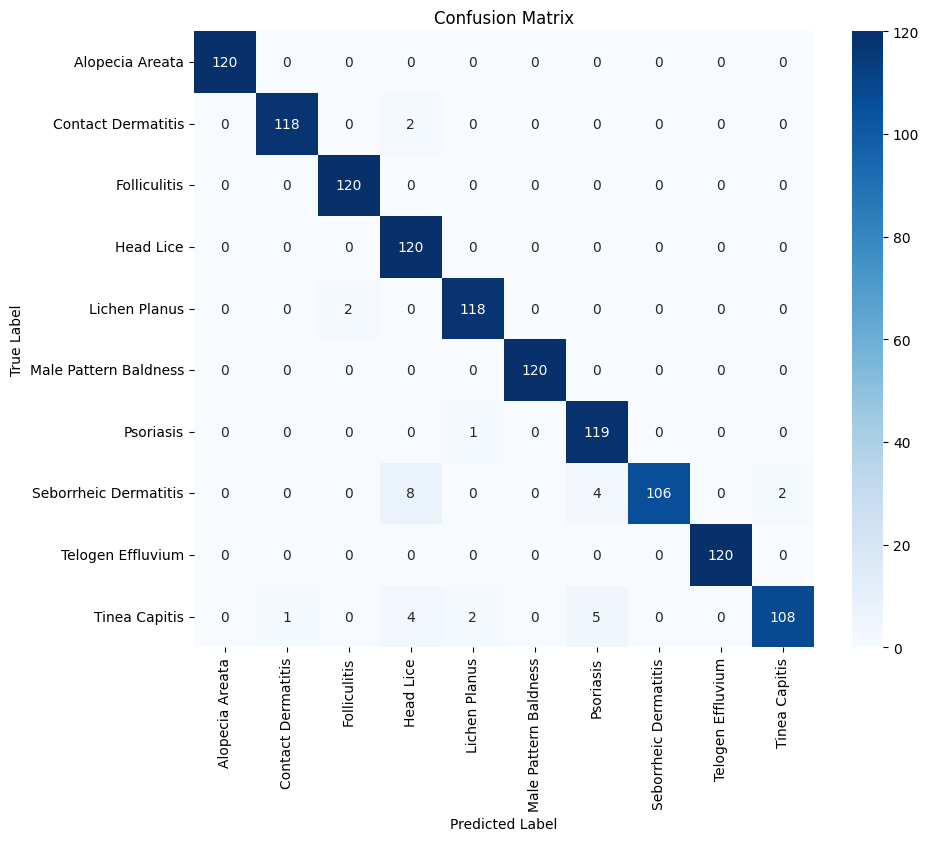

In [24]:
y_true = test_generator.classes

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

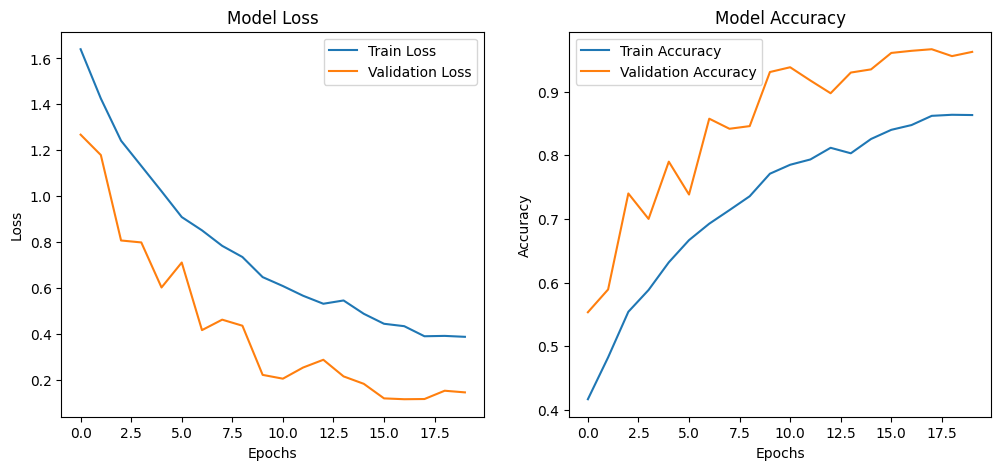

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

if 'accuracy' in history.history:
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

plt.show()